**Aikins Acheampong**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pca

In [9]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [12]:
pca_analysis = pca.PCA(df)
pca_analysis.fit(df.columns.tolist(), normalize_dataset=True)

<Figure size 1000x600 with 0 Axes>

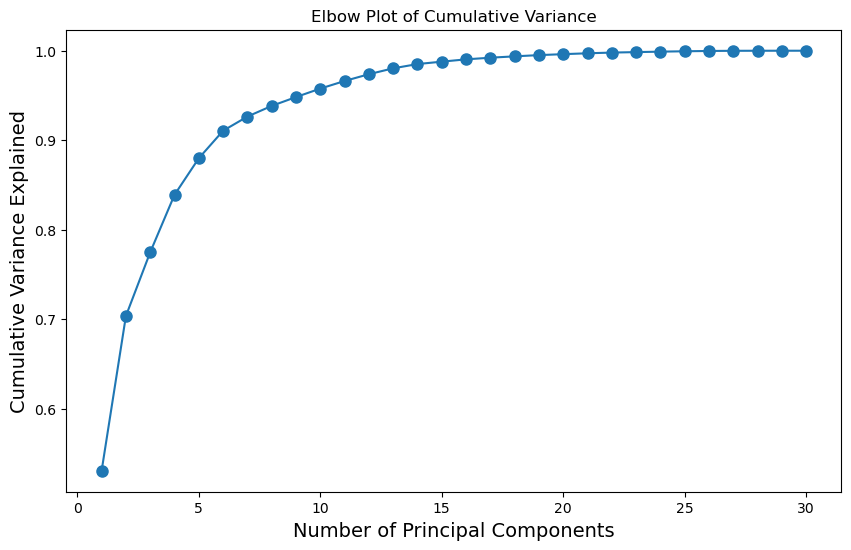

In [14]:
plt.figure(figsize=(10, 6))
pca_analysis.elbow_plot()
plt.title('Elbow Plot of Cumulative Variance')
plt.show()


In [15]:
print("Variance explained by top 5 PCs:")
for i, var in enumerate(pca_analysis.prop_var[:5]):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

print("Cumulative variance for top 5 PCs:")
for i, cum_var in enumerate(pca_analysis.cum_var[:5]):
    print(f"First {i+1} PCs: {cum_var:.3f} ({cum_var*100:.1f}%)")


Variance explained by top 5 PCs:
PC1: 0.531 (53.1%)
PC2: 0.173 (17.3%)
PC3: 0.071 (7.1%)
PC4: 0.064 (6.4%)
PC5: 0.041 (4.1%)
Cumulative variance for top 5 PCs:
First 1 PCs: 0.531 (53.1%)
First 2 PCs: 0.704 (70.4%)
First 3 PCs: 0.775 (77.5%)
First 4 PCs: 0.839 (83.9%)
First 5 PCs: 0.880 (88.0%)


<Figure size 1200x800 with 0 Axes>

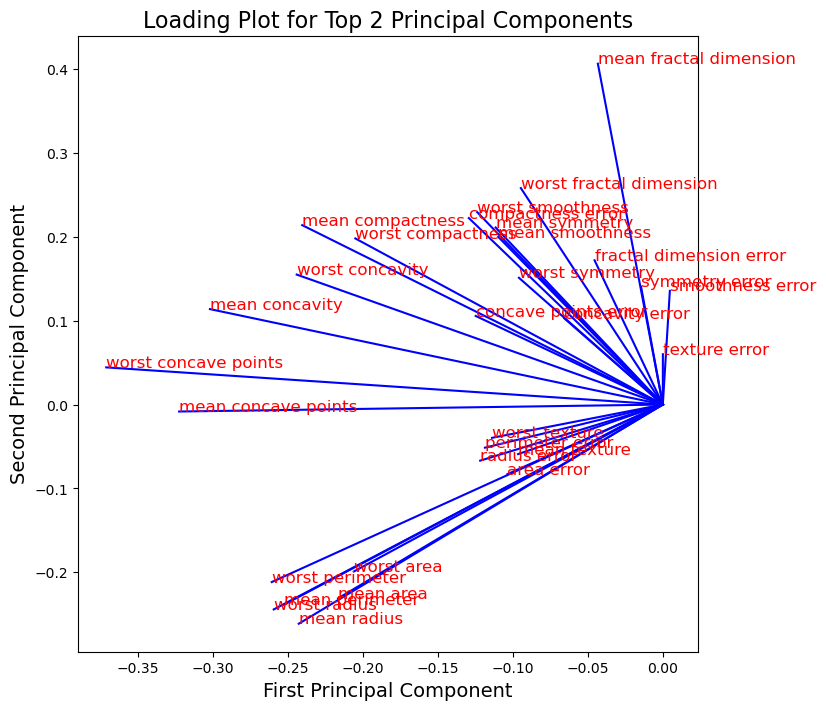

In [16]:
plt.figure(figsize=(12, 8))
pca_analysis.loading_plot()
plt.show()


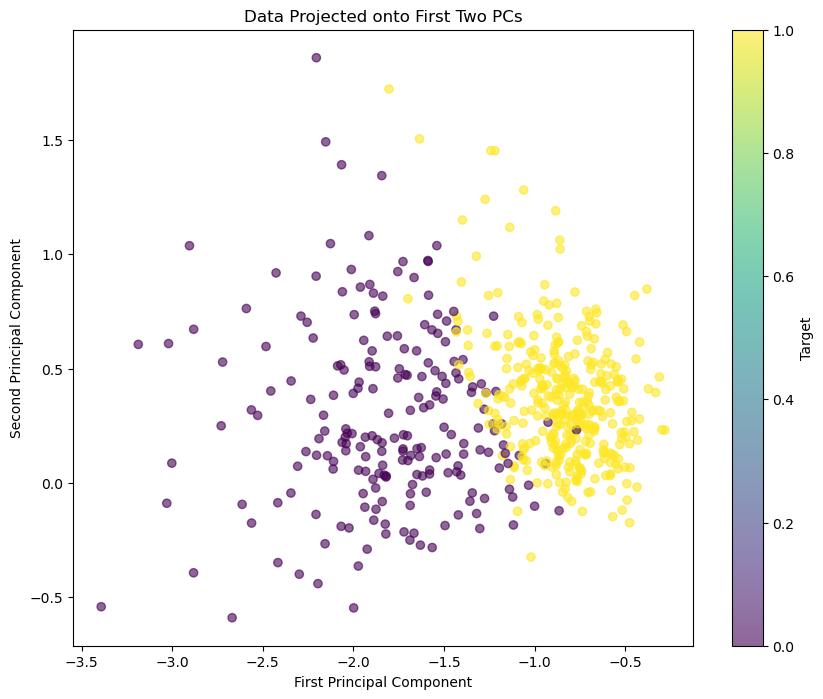

In [17]:
projected_data = pca_analysis.pca_project([0, 1])

plt.figure(figsize=(10, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], 
           c=data.target, cmap='viridis', alpha=0.6)
plt.colorbar(label='Target')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Projected onto First Two PCs')
plt.show()



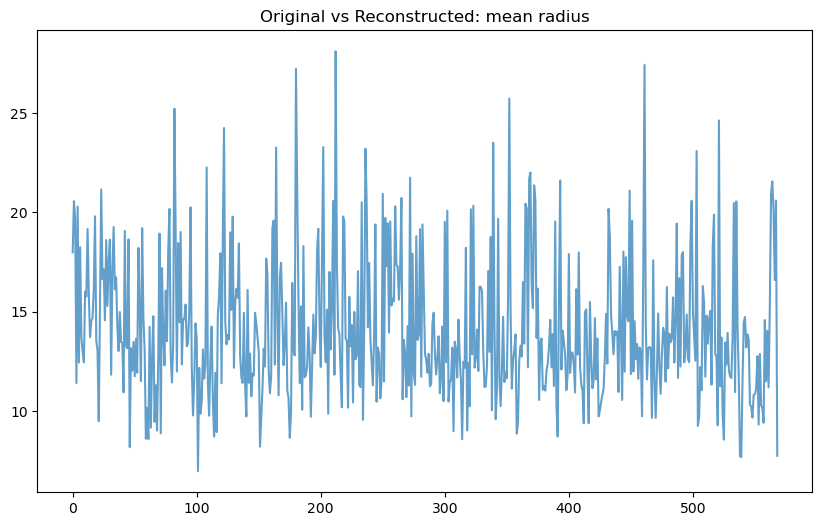

In [20]:
n_components = 5
reconstructed = pca_analysis.pca_then_project_back(n_components)

reconstructed_df = pd.DataFrame(reconstructed, columns=df.columns)

feature_name = df.columns[0]
plt.figure(figsize=(10, 6))
plt.plot(df[feature_name].values, label='Original', alpha=0.7)
plt.plot(reconstructed_df[feature_name].values, label=f'Reconstructed ({n_components} PCs)', alpha=0.7)
plt.title(f'Original vs Reconstructed: {feature_name}')

plt.show()